In [1]:
#Arpit Arora
#101917024
#3CS1
#importing dataset
from google.colab import files
uploaded = files.upload()

Saving AWCustomers.csv to AWCustomers.csv


In [2]:
#creating dataframe
import pandas as pd
data = pd.read_csv("AWCustomers.csv")

In [3]:
#PART 1 A)
df = pd.DataFrame(data)
df

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,LastUpdated
0,21173,NaN,Chad,C,Yuan,NaN,7090 C. Mount Hood,NaN,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0115,1987-11-13,Bachelors,Clerical,M,M,1,3,0,1,81916,2017-03-06
1,13249,NaN,Ryan,NaN,Perry,NaN,3651 Willow Lake Rd,NaN,Shawnee,British Columbia,Canada,V9B 2C3,787-555-0136,1972-07-21,Partial College,Clerical,M,M,1,2,1,2,81076,2017-03-06
2,29350,NaN,Julia,NaN,Thompson,NaN,1774 Tice Valley Blvd.,NaN,West Covina,California,United States,91791,120-555-0111,1985-11-09,Bachelors,Clerical,F,S,0,3,0,0,86387,2017-03-06
3,13503,NaN,Theodore,NaN,Gomez,NaN,2103 Baldwin Dr,NaN,Liverpool,England,United Kingdom,L4 4HB,1 (11) 500 555-0167,1977-10-18,Partial College,Skilled Manual,M,M,1,2,1,2,61481,2017-03-06
4,22803,NaN,Marshall,J,Shan,NaN,Am Gallberg 234,NaN,Werne,Nordrhein-Westfalen,Germany,59368,1 (11) 500 555-0113,1975-02-05,Partial College,Skilled Manual,M,S,1,1,0,0,51804,2017-03-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18356,25414,NaN,Grace,C,Bailey,NaN,6627 Camelback Ct.,NaN,Coronado,California,United States,92118,292-555-0130,1990-11-11,Graduate Degree,Skilled Manual,F,M,0,1,0,2,52953,2017-03-06
18357,11459,NaN,Tasha,NaN,Deng,NaN,9627 Kendall Rd,NaN,Port Macquarie,New South Wales,Australia,2444,1 (11) 500 555-0171,1992-10-13,Bachelors,Skilled Manual,F,S,0,2,0,0,60992,2017-03-06
18358,12160,NaN,Jaclyn,NaN,Zhang,NaN,4364 Viera Avenue,NaN,Beaverton,Oregon,United States,97005,819-555-0110,1983-11-24,Partial College,Skilled Manual,F,S,0,2,0,0,51859,2017-03-06
18359,14353,NaN,Erin,I,Reed,NaN,3866 Mt. Everest Court,NaN,Vancouver,British Columbia,Canada,V7L 4J4,791-555-0118,1995-06-15,High School,Clerical,F,S,0,0,0,0,87177,2017-03-06


In [4]:
#PART 1 B) 
#filtering out unnecessary columns
n_df = df.filter(['CustomerID','FirstName','LastName','AddressLine1','City','StateProvinceName','CountryRegionName','PostalCode','PhoneNumber','Occupation','Education','HomeOwnerFlag','NumberCarOwned','Gender','MaritalStatus','NumberChildrenAtHome','YearlyIncome'],axis=1)
n_df

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,Occupation,Education,HomeOwnerFlag,Gender,MaritalStatus,NumberChildrenAtHome,YearlyIncome
0,21173,Chad,Yuan,7090 C. Mount Hood,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0115,Clerical,Bachelors,1,M,M,0,81916
1,13249,Ryan,Perry,3651 Willow Lake Rd,Shawnee,British Columbia,Canada,V9B 2C3,787-555-0136,Clerical,Partial College,1,M,M,1,81076
2,29350,Julia,Thompson,1774 Tice Valley Blvd.,West Covina,California,United States,91791,120-555-0111,Clerical,Bachelors,0,F,S,0,86387
3,13503,Theodore,Gomez,2103 Baldwin Dr,Liverpool,England,United Kingdom,L4 4HB,1 (11) 500 555-0167,Skilled Manual,Partial College,1,M,M,1,61481
4,22803,Marshall,Shan,Am Gallberg 234,Werne,Nordrhein-Westfalen,Germany,59368,1 (11) 500 555-0113,Skilled Manual,Partial College,1,M,S,0,51804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18356,25414,Grace,Bailey,6627 Camelback Ct.,Coronado,California,United States,92118,292-555-0130,Skilled Manual,Graduate Degree,0,F,M,0,52953
18357,11459,Tasha,Deng,9627 Kendall Rd,Port Macquarie,New South Wales,Australia,2444,1 (11) 500 555-0171,Skilled Manual,Bachelors,0,F,S,0,60992
18358,12160,Jaclyn,Zhang,4364 Viera Avenue,Beaverton,Oregon,United States,97005,819-555-0110,Skilled Manual,Partial College,0,F,S,0,51859
18359,14353,Erin,Reed,3866 Mt. Everest Court,Vancouver,British Columbia,Canada,V7L 4J4,791-555-0118,Clerical,High School,0,F,S,0,87177


In [ ]:
#PART 1 C)
#Determining the data types
#HomeOwnerFlag --> Nominal
#Gender --> Nominal
#HomeOwnerStatus --> Nominal
#MaritalStatus --> Nominal
#NumberChildrenAtHome --> Ordinal
#YearlyIncome --> Continous

In [5]:
#PART 2
n_df.describe()

,CustomerID,HomeOwnerFlag,NumberChildrenAtHome,YearlyIncome
count,18361.000000,18361.000000,18361.000000,18361.000000
mean,20241.987092,0.610588,0.338162,72754.779642
std,5336.332731,0.487630,0.568957,30686.014313
min,11000.000000,0.000000,0.000000,25435.000000
25%,15621.000000,0.000000,0.000000,53312.000000
50%,20248.000000,1.000000,0.000000,61851.000000
75%,24863.000000,1.000000,1.000000,87410.000000
max,29483.000000,1.000000,3.000000,139115.000000


In [6]:
n_df.isnull().sum()
#zero nulls in data set

CustomerID              0
FirstName               0
LastName                0
AddressLine1            0
City                    0
StateProvinceName       0
CountryRegionName       0
PostalCode              0
PhoneNumber             0
Occupation              0
Education               0
HomeOwnerFlag           0
Gender                  0
MaritalStatus           0
NumberChildrenAtHome    0
YearlyIncome            0
dtype: int64

In [7]:
#normalization
n_df['n_income'] = (n_df['YearlyIncome'] - n_df['YearlyIncome'].min()) / (n_df['YearlyIncome'].max() - n_df['YearlyIncome'].min())

In [8]:
n_df

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,Occupation,Education,HomeOwnerFlag,Gender,MaritalStatus,NumberChildrenAtHome,YearlyIncome,n_income
0,21173,Chad,Yuan,7090 C. Mount Hood,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0115,Clerical,Bachelors,1,M,M,0,81916,0.496842
1,13249,Ryan,Perry,3651 Willow Lake Rd,Shawnee,British Columbia,Canada,V9B 2C3,787-555-0136,Clerical,Partial College,1,M,M,1,81076,0.489453
2,29350,Julia,Thompson,1774 Tice Valley Blvd.,West Covina,California,United States,91791,120-555-0111,Clerical,Bachelors,0,F,S,0,86387,0.536172
3,13503,Theodore,Gomez,2103 Baldwin Dr,Liverpool,England,United Kingdom,L4 4HB,1 (11) 500 555-0167,Skilled Manual,Partial College,1,M,M,1,61481,0.317083
4,22803,Marshall,Shan,Am Gallberg 234,Werne,Nordrhein-Westfalen,Germany,59368,1 (11) 500 555-0113,Skilled Manual,Partial College,1,M,S,0,51804,0.231958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18356,25414,Grace,Bailey,6627 Camelback Ct.,Coronado,California,United States,92118,292-555-0130,Skilled Manual,Graduate Degree,0,F,M,0,52953,0.242065
18357,11459,Tasha,Deng,9627 Kendall Rd,Port Macquarie,New South Wales,Australia,2444,1 (11) 500 555-0171,Skilled Manual,Bachelors,0,F,S,0,60992,0.312781
18358,12160,Jaclyn,Zhang,4364 Viera Avenue,Beaverton,Oregon,United States,97005,819-555-0110,Skilled Manual,Partial College,0,F,S,0,51859,0.232442
18359,14353,Erin,Reed,3866 Mt. Everest Court,Vancouver,British Columbia,Canada,V7L 4J4,791-555-0118,Clerical,High School,0,F,S,0,87177,0.543121


In [9]:
len(n_df['CountryRegionName'].unique())

6

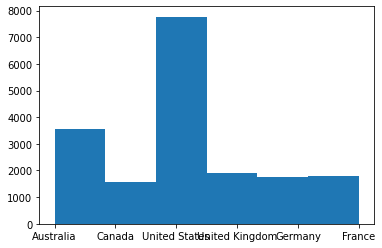

In [10]:
#binning
import matplotlib.pyplot as plt

country = n_df['CountryRegionName']
plt.hist(country,bins=6)
plt.show()

In [ ]:
#since united states has the highest number of potential customers

[0 1 2 3]


(array([13038.,  4468.,   824.,    31.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <a list of 4 Patch objects>)

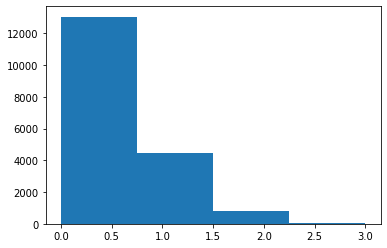

In [11]:
#binning with respect to number of children at home
print(n_df['NumberChildrenAtHome'].unique())
plt.hist(n_df['NumberChildrenAtHome'],bins = 4)

In [12]:
#binarization
n_df['YearlyIncome'].mean()
#72754.77964163171
from sklearn.preprocessing import Binarizer
salary = n_df.iloc[:, 15].values
salary
y = salary
y = y.reshape(1,-1)
bin = Binarizer(7300)
x = bin.fit_transform(y) 
x

array([[1, 1, 1, ..., 1, 1, 1]])